# ACCIDENTS IN FRANCE 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings('default')

<h2> OUR DATA SET 

In [3]:
#loading the data
characteristics = pd.read_csv("caracteristics.csv")
holidays = pd.read_csv("holidays.csv")
places = pd.read_csv("places.csv")
users = pd.read_csv("users.csv")
vehicles = pd.read_csv("vehicles.csv")

In [4]:
characteristics.dropna()
holidays.dropna()
places.dropna()
users.dropna()
vehicles.dropna();

<h2> PREPARE THE DATA

<h3> characteristics

| attribute | definition |
| --- | --- |
| day | Day of the accident|
| month | Month of the accident |
| an | Year of the accident|
| hour | Time of the accident in hour and minutes (hhmm) |
| lum | lighting conditions in which the accident occurred |
|dep | Departmeent : INSEE Code (National Institute of Statistics and Economic Studies) of the departmeent followed by a 0 (201 Corse-du-Sud - 202 Haute-Corse)|
|com | Municipality: The commune number is a code given by INSEE. The code has 3 numbers set to the right|
|int | Type of Intersection |
|atm | Atmospheric conditions|
|col | Type of collision|
|adr | Postal address: variable filled in for accidents occurring in built-up areas|
|gps | GPS coding: 1 originator character|


|**lum** | **Localisation** |**int** | **atm** |**col**|**gps**|**Geographic coordinates in decimal degree:**|
| --- | --- | --- | --- | --- | --- | --- |
|1  Full day |1  Out of agglomeration|1  Out of intersection|1 Normal|1 Two vehicles - frontal| 0  Métropole|1  Latitude|
|2  Twilight or dawn |2  In built-up areas|2  Intersection in X|2  Light rain|2  Two vehicles - from the rear|1  Antilles (Martinique or Guadeloupe)|2 Longitude|
|3  Night without public lighting | |3  Intersection in T|3  Heavy rain|3 Two vehicles - by the side|2  Guyane| |
|4  Night with public lighting not lit| |4  Intersection in Y|4  Snow - hail|4  Three vehicles and more - in chain|3  Réunion| |
|5  Night with public lighting on | |5 Intersection with more than 4 branches|5  Fog - smoke|5  Three or more vehicles - multiple collisions|4  Mayotte| |
| | |6  Giratory|6  Strong wind - storm| 6  Other collision| | |
| | |7  Place|7  Dazzling weather|7  Without collision| | |
| | |8  Level crossing|8 Cloudy weather| | | | |
| | |9  Other intersection|9  Other| | | | |


In [185]:
characteristics = characteristics.replace(to_replace = {'nan' : 'NULL'})
characteristics = characteristics.replace(to_replace = {'M' : 0, 'A' : 1, 'G': 2, 'R':3, 'Y':4, 'lat': 1, 'long':2})
characteristics.dropna();

In [186]:
characteristics['atm'] = [x if x <=8 else 15 for x in characteristics['atm']]
characteristics = characteristics[characteristics['atm'] <= 8]
#characteristics_reg_un['y'] = [1 if x >= 0.5 else 0 for x in characteristics_reg_un['suma']]
characteristics = characteristics[characteristics['com'] <= max(characteristics['com'] )]

<h3> holidays

In [4]:
holidays['ds'] = holidays['ds'].str.replace('-', '')

<h3>  places </h3>

| attribute | definition |
| --- | --- |
|Num_Acc | Accident ID|
|catr | Category of road|
|voie | Road Number|
|V1 | Numeric index of the route number (example: 2 bis, 3 ter etc.)|
|V2 | Letter alphanumeric index of the road|
|circ | Traffic regime|
|nbv | Total number of traffic lanes|
|vosp | Indicates the existence of a reserved lane, regardless of whether or not the accident occurs on that lane.|
|Prof| Longitudinal profile describes the gradient of the road at the accident site|
|pr| Home PR number (upstream terminal number)|
|pr1| Distance in meters to the PR (relative to the upstream terminal)|
|plan| Drawing in plan|
|lartpc| Central solid land width (TPC) if there is|
|larrout| Width of the roadway assigned to vehicle traffic are not included the emergency stop strips, CPRs and parking spaces|
|surf| surface condition|
|infra| Development - Infrastructure|
|situ| Situation of the accident|
|env1| school point: near a school

|**catr** |   **circ**|**vosp**|**Prof**|**plan**|**surf**|**infra**|**situ**
| --- | --- | ---| --- | --- | --- | --- | --- |  
| 1 - Highway |   1 - One way|1 - Bike path|1 - Dish|1 - Straight part|1 - normal|1 - Underground - tunnel|1 - On the road|
|2 - National Road   |   2 - Bidirectional|2 - Cycle Bank|2 - Slope|2 - Curved on the left|2 - wet|2 - Bridge - autopont|2 - On emergency stop band|
|3 - Departmental Road|   3 - Separated carriageways|3 - Reserved channel|3 - Hilltop|3 - Curved right|3 - puddles|3 - Exchanger or connection brace|3 - On the verge|
|4 - Communal Way |   4 - With variable assignment channels| |4- Hill bottom|4 - In "S"|4 - flooded|4 - Railway|4 - On the sidewalk|
|5 - Off public network  | | | | |5 - snow|5 - Carrefour arranged|5 - On bike path|
|6 - Parking lot open to public traffic | | | | |6 - mud|6 - Pedestrian area| |
|6 - Parking lot open to public traffic | | | | |7 - icy|7 - Toll zone||
|9 - other| | | | |8 - fat - oil| | |
|| | | | |9 - other| | |

In [5]:
places = places.replace(to_replace = {'nan' : 'NULL'})
places.dropna();

<h3> USERS </h3>

| attribute | definition |
| --- | --- |
|Acc_number | Accident identifier|
|Num_Veh| Identification of the vehicle taken back for each user occupying this vehicle (including pedestrians who are attached to the vehicles that hit them)|
|place| Allows to locate the place occupied in the vehicle by the user at the time of the accident|
|catu| User category|
|grav| Severity of the accident: The injured users are classified into three categories of victims plus the uninjured|
|sexe| Sex of the user|
|secu| on 2 characters: the first concerns the existence of a safety equipment and the second is the use of Safety Equipment|
|locp| Location of the pedestrian|
|etatp| This variable is used to specify whether the injured pedestrian was alone or not|


|**catu**|**grav**| **sex** | **secu1** | **sec2**| **locp**|**Moving**| **etatp**
| --- | --- | --- | --- | --- | --- | --- | --- |
|1 - Driver|1 - Unscathed|1 - Male|1 - Belt|1 - Yes|1 - A + 50 m from the pedestrian crossing(On pavement)|0 - not specified or not applicable|1 - Only|
|2 - Passenger|2 - Killed|2 - Female|2 - Helmet|2 - No|2 - A - 50 m from the pedestrian crossing(On pavement)|1 - Meaning bumping vehicle|2 - Accompanied|
|3 - Pedestrian|3 - Hospitalized wounded| |3 - Children's device |3 - Not determinable|3 - Without light signaling(On pedestrian crossing)|2 - Opposite direction of the vehicle Various|3 - In a group|
|4 - Pedestrian in rollerblade or scooter|4 - Light injury| |4 - Reflective equipment| |4 - With light signaling(On pedestrian crossing)|3 - Crossing| |
| | | |5 - Promenade - leisure| |5 - On the sidewalk(Various)|4 - Masked| |
| | | |9 - Other|  |6 - On the verge(Various)|5 - Playing - running|
| | | | |  |7 - On refuge or BAU(Various)|6 - With animal|
| | | | |  |8 - On against aisle(Various)|9 - Other|


<h3>VEHICLES</h3>

| attribute | definition |
| --- | --- |
|Num_Acc| Accident ID|
|Num_Veh| Identification of the vehicle taken back for each user occupying this vehicle (including pedestrians who are attached to vehicles that hit them) - alphanumeric code|
|GP | Flow direction |
|CATV | Category of vehicle|

|**GP**|**CATV**|
| --- | --- |
|1 - PK or PR or increasing postal address number|01 - Bicycle|
|2 - PK or PR or descending postal address number|02 - Moped <50cm3|
| |03 - Cart (Quadricycle with bodied motor) (formerly "cart or motor tricycle")
| |04 - Not used since 2006 (registered scooter)
| |05 - Not used since 2006 (motorcycle)
| |06 - Not used since 2006 (side-car)
| |07 - VL only
| |08 - Not used category (VL + caravan)
| |09 - Not used category (VL + trailer)
| |10 - VU only 1,5T <= GVW <= 3,5T with or without trailer (formerly VU only 1,5T <= GVW <= 3,5T)
| |11 - Most used since 2006 (VU (10) + caravan)
| |12 - Most used since 2006 (VU (10) + trailer)
| |13 - PL only 3,5T


<h2> DIAGRAMS

			------NUM OF ACCIDENTS DEPENDING ON -CHARACTIRSTIC- ATTRIBUTES------



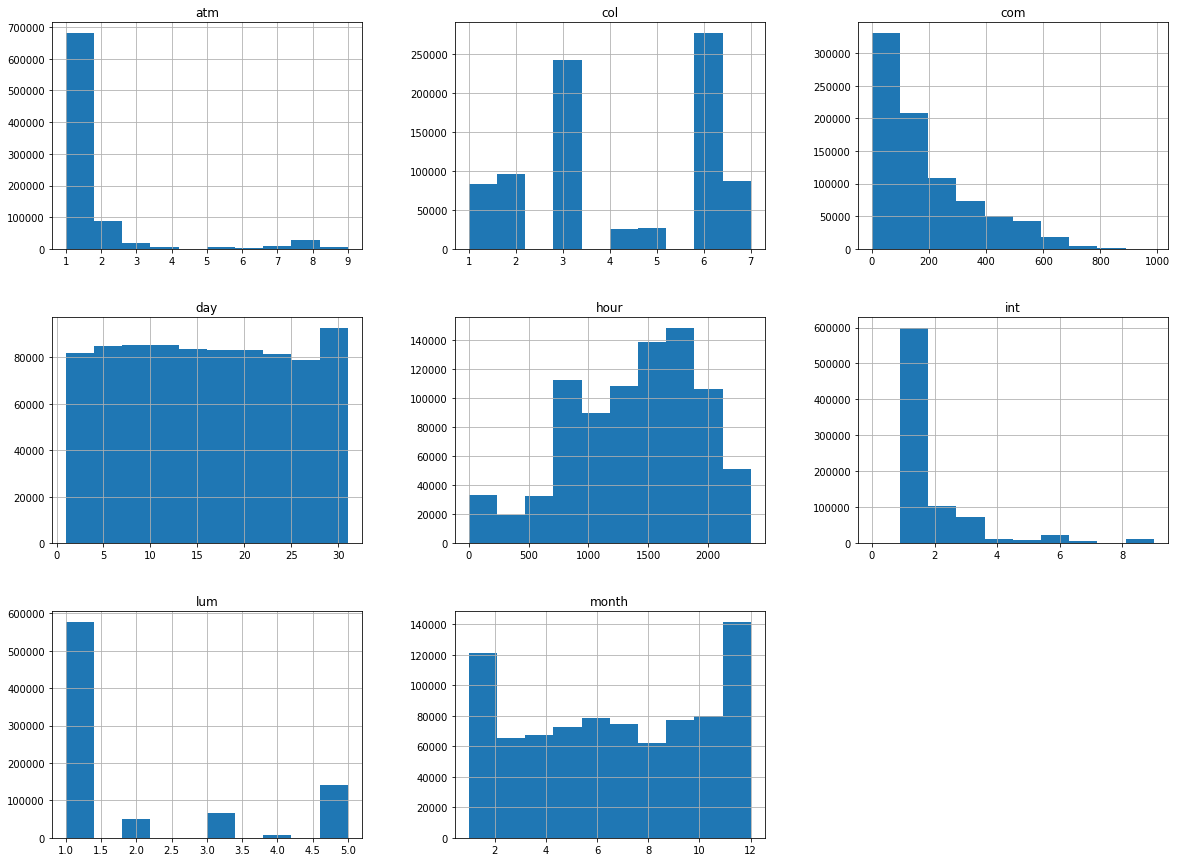

In [6]:
print("\t\t\t------NUM OF ACCIDENTS DEPENDING ON -CHARACTIRSTIC- ATTRIBUTES------\n")
characteristics.hist(column = ['month', 'day', 'hour', 'atm', 'int', 'col', 'lum', 'com'], figsize=(20, 15));

			------NUM OF ACCIDENTS DEPENDING ON -PLACES- ATTRIBUTES------



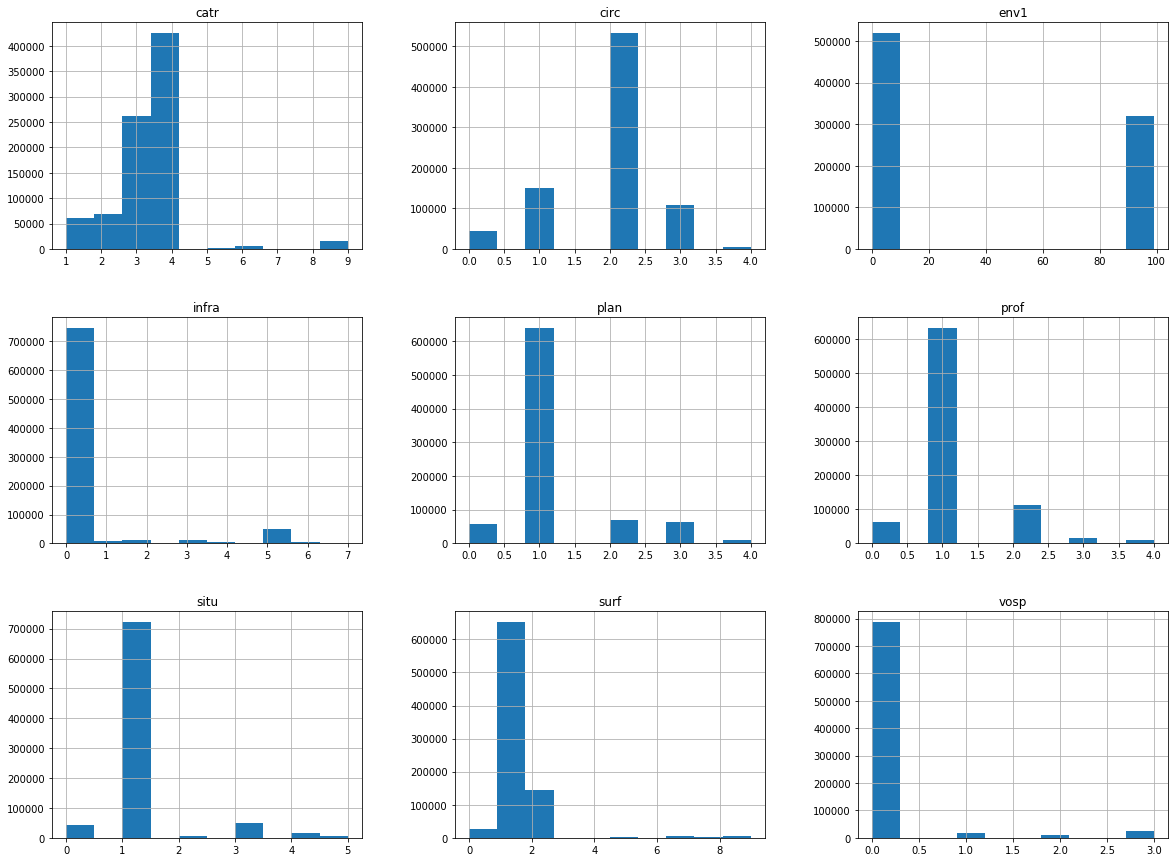

In [7]:
print("\t\t\t------NUM OF ACCIDENTS DEPENDING ON -PLACES- ATTRIBUTES------\n")
places.hist(column = ['catr', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'env1'], figsize=(20, 15));

			------NUM OF ACCIDENTS DEPENDING ON -USERS- ATTRIBUTES------



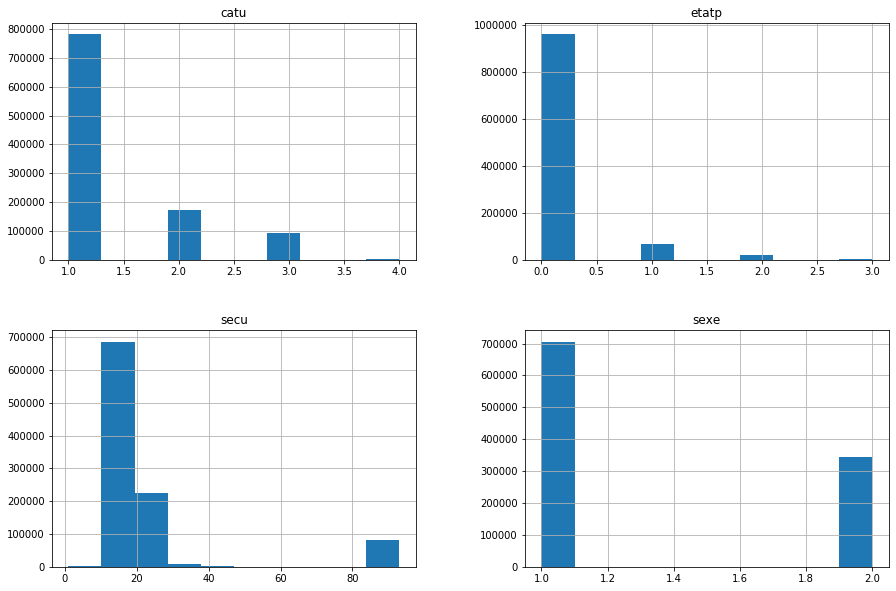

In [8]:
print("\t\t\t------NUM OF ACCIDENTS DEPENDING ON -USERS- ATTRIBUTES------\n")
users.hist(column = ['catu', 'sexe', 'secu', 'etatp'], figsize=(15, 10));

			------NUM OF ACCIDENTS DEPENDING ON -VEHICLES- ATTRIBUTES------



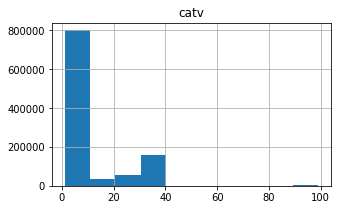

In [9]:
print("\t\t\t------NUM OF ACCIDENTS DEPENDING ON -VEHICLES- ATTRIBUTES------\n")
vehicles.hist(column = ['catv'], figsize=(5, 3));

<h3> Predictions

Predict what is the possibility of an accident to occure knowing: the month(month), day(day), lighting conditions(lum), Atmospheric conditions(atm), Municipality(cum)

In [27]:
characteristics_reg = characteristics[['month', 'day', 'hour', 'atm', 'lum','com']]
characteristics_reg['suma'] = [1]*(characteristics_reg.shape[0])

In [28]:
#dup = (columns = ['timi']
dup = pd.DataFrame(characteristics_reg.duplicated(subset=None, keep='last'), columns=['timi'])
dup['row'] = list(range(0, dup.shape[0], 1))
dup = dup[dup['timi'] == True]
dup

,timi,row
8,True,8
85,True,85
187,True,187
277,True,277
281,True,281
...,...,...
831425,True,831425
833097,True,833097
834596,True,834596
835386,True,835386


In [29]:
for i in range(0, dup.shape[0]):
    l = dup.iloc[i].loc['row']
    char = characteristics_reg[characteristics_reg['month'] == characteristics_reg.iloc[l].loc['month']]
    char = char[char['com'] == characteristics_reg.iloc[l].loc['com']]
    char = char[char['day'] == characteristics_reg.iloc[l].loc['day']]
    char = char[char['hour'] == characteristics_reg.iloc[l].loc['hour']]
    char = char[char['atm'] == characteristics_reg.iloc[l].loc['atm']]
    char = char[char['lum'] == characteristics_reg.iloc[l].loc['lum']]
    characteristics_reg.at[l,'suma'] = char.shape[0]

In [41]:
characteristics_reg_un = characteristics_reg.drop_duplicates(characteristics_reg.columns[:-1], keep='first')
mo = characteristics_reg_un['suma'].mean()
characteristics_reg_un.dropna();
characteristics_reg_un['atm'] = [x if x <=8 else 15 for x in characteristics_reg_un['atm']]
characteristics_reg_un = characteristics_reg_un[characteristics_reg_un['atm'] <= 8]
characteristics_reg_un = characteristics_reg_un[characteristics_reg_un['com'] <= max(characteristics_reg_un['com'] )]

I will consider the values which 'suma' < 0.5 as '0' (no big possibility for an accident to occure) and the others as '1'

In [42]:
characteristics_reg_un['y'] = [1 if x >= mo else 0 for x in characteristics_reg_un['suma']]
characteristics_reg_un

,month,day,hour,atm,lum,com,suma,y
0,2,1,1445,8.0,1,5.0,1,0
1,3,16,1800,1.0,1,5.0,1,0
2,7,13,1900,1.0,1,11.0,1,0
3,8,15,1930,7.0,2,477.0,1,0
4,12,23,1100,1.0,1,11.0,1,0
...,...,...,...,...,...,...,...,...
839980,12,21,2035,1.0,5,416.0,1,0
839981,12,23,1010,1.0,1,416.0,1,0
839982,12,26,1715,1.0,1,416.0,1,0
839983,12,27,1500,2.0,1,416.0,1,0


In [43]:
# split the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(characteristics_reg_un[::], test_size=0.2, random_state=8)

x_train = train.drop(['y', 'suma'], axis=1)
y_train = train['y']

x_test = test.drop(['y', 'suma'], axis=1)
y_test = test['y']


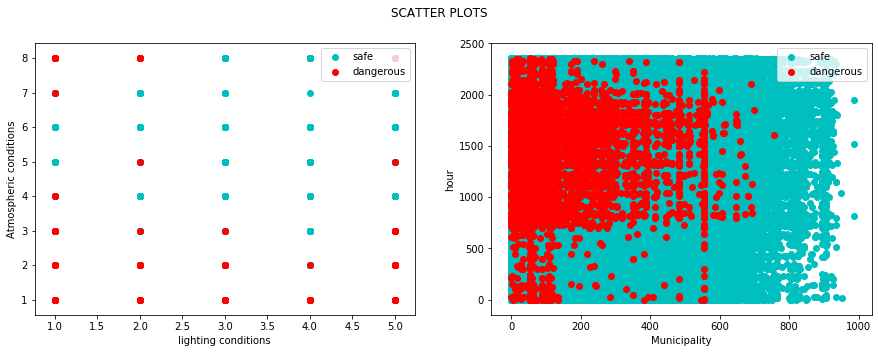

In [44]:
colors = ['c','r']
label_text = ["safe" ,"dangerous"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for cur_colour in [0, 1]:
    cur_df = train[train['y'] == cur_colour]
    axes[0].scatter(cur_df['lum'], cur_df['atm'], c = colors[cur_colour], label=label_text[cur_colour])
    
for cur_colour in [0, 1]:
    cur_df = train[train['y'] == cur_colour]
    axes[1].scatter(cur_df['com'], cur_df['hour'], c = colors[cur_colour], label=label_text[cur_colour])

fig.suptitle("SCATTER PLOTS")
axes[0].set(xlabel="lighting conditions", ylabel="Atmospheric conditions")
axes[1].set(xlabel="Municipality", ylabel="hour")
axes[1].legend(loc=1);
axes[0].legend(loc=1);

In [45]:
from sklearn.linear_model import LogisticRegression
print("\n---------------------------------------------------------------------------------\n")
fitted_lr = LogisticRegression(C=1e7 ,solver='newton-cg', multi_class= 'ovr', max_iter = 1000000)
fitted_lr= fitted_lr.fit(x_train, y_train)
print("Parameters with sklearn fit:\n{}".format(fitted_lr.coef_))
print("const with sklearn fit:\n{}".format(fitted_lr.intercept_))
print("\n---------------------------------------------------------------------------------\n")


---------------------------------------------------------------------------------

Parameters with sklearn fit:
[[ 9.72985209e-03 -1.36564099e-03  2.86808453e-04 -1.22958865e+00
  -2.72038627e-01 -4.03900497e-03]]
const with sklearn fit:
[-2.00322917]

---------------------------------------------------------------------------------



In [46]:
fitted_lr.score(x_train, y_train)

0.9815738141317402

In [47]:
fitted_lr.score(x_test, y_test)

0.9815187657962535

In [1]:
from sklearn.metrics import confusion_matrix

y_pred = fitted_lr.predict(x_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred)

SyntaxError: unexpected EOF while parsing (<ipython-input-1-c4cfa7ec8e42>, line 5)

Predict what is the possibility of an accident to occure knowing: the Category of road(catr), Traffic regime(circ), existence of a reserved lane(vosp), surface condition(surf)

In [49]:
places_temp = places[['Num_Acc', 'catr', 'circ', 'vosp', 'surf']]
users_temp = users[['Num_Acc', 'catu']]
#df = pd.merge(places_temp, users_temp, on='Num_Acc')
df = places_temp.drop(['Num_Acc'] , axis=1)
df

,catr,circ,vosp,surf
0,3.0,2.0,0.0,1.0
1,3.0,1.0,0.0,1.0
2,3.0,2.0,0.0,2.0
3,4.0,2.0,0.0,1.0
4,4.0,0.0,0.0,1.0
...,...,...,...,...
839980,4.0,2.0,0.0,1.0
839981,4.0,2.0,0.0,1.0
839982,4.0,1.0,0.0,1.0
839983,4.0,2.0,0.0,1.0


In [50]:
df['suma'] = [1]*(df.shape[0])
#dup = (columns = ['timi']
dup = pd.DataFrame(df.duplicated(subset=None, keep='last'), columns=['timi'])
dup['row'] = list(range(0, dup.shape[0], 1))
dup = dup[dup['timi'] == True]
dup

,timi,row
0,True,0
1,True,1
2,True,2
3,True,3
4,True,4
...,...,...
839975,True,839975
839977,True,839977
839978,True,839978
839980,True,839980


In [51]:
df['row'] = list(range(0, df.shape[0], 1))

In [52]:
i = 0
while True:
    l = dup.iloc[i].loc['row']
    char = pd.DataFrame(columns = ['catr', 'circ', 'vosp', 'surf', 'row'])
    char = df[df['catr'] == df.iloc[l].loc['catr']]
    char = char[char['circ'] == df.iloc[l].loc['circ']]
    char = char[char['vosp'] == df.iloc[l].loc['vosp']]
    char = char[char['surf'] == df.iloc[l].loc['surf']]
    #char = char[char['catu'] == df.iloc[l].loc['catu']]
    dup['row'] = [x if x not in char['row'] else -1 for x in dup['row']]
    dup = dup[dup['row'] != -1]
    df.at[l,'suma'] = char.shape[0]
    if i + 1 >= dup.shape[0]:
        break
    else:
        i = i+1

In [55]:
df = df[['catr', 'circ', 'vosp', 'surf', 'suma']]
df_un = df.drop_duplicates(df.columns[:-1], keep='first')
mo = df_un['suma'].mean()
df_un['y'] = [1 if x >= mo else 0 for x in df_un['suma']]
df_un.dropna();

In [56]:
df_un = df_un[df_un['catr'] <= max(df_un['catr'] )]
df_un = df_un[df_un['circ'] <= max(df_un['circ'] )]
df_un = df_un[df_un['vosp'] <= max(df_un['vosp'] )]
df_un = df_un[df_un['surf'] <= max(df_un['surf'] )]

In [57]:
# split the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_un[::], test_size=0.2, random_state=8)

x_train = train.drop(['y', 'suma'], axis=1)
y_train = train['y']

x_test = test.drop(['y', 'suma'], axis=1)
y_test = test['y']


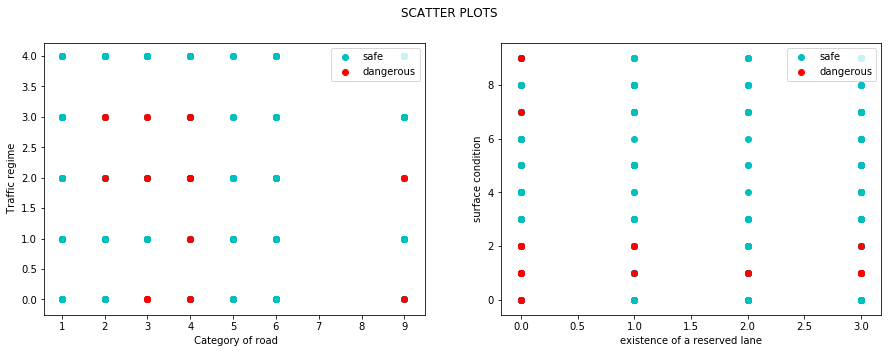

In [58]:
colors = ['c','r']
label_text = ["safe" ,"dangerous"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for cur_colour in [0, 1]:
    cur_df = train[train['y'] == cur_colour]
    axes[0].scatter(cur_df['catr'], cur_df['circ'], c = colors[cur_colour], label=label_text[cur_colour])
    
for cur_colour in [0, 1]:
    cur_df = train[train['y'] == cur_colour]
    axes[1].scatter(cur_df['vosp'], cur_df['surf'], c = colors[cur_colour], label=label_text[cur_colour])

fig.suptitle("SCATTER PLOTS")
axes[0].set(xlabel=" Category of road", ylabel=" Traffic regime")
axes[1].set(xlabel="existence of a reserved lane", ylabel="surface condition")
axes[1].legend(loc=1);
axes[0].legend(loc=1);

In [59]:
from sklearn.linear_model import LogisticRegression
print("\n---------------------------------------------------------------------------------\n")
fitted_lr = LogisticRegression(C=1e7 ,solver='newton-cg', multi_class= 'ovr', max_iter = 1000000)
fitted_lr= fitted_lr.fit(x_train, y_train)
print("Parameters with sklearn fit:\n{}".format(fitted_lr.coef_))
print("const with sklearn fit:\n{}".format(fitted_lr.intercept_))
print("\n---------------------------------------------------------------------------------\n")


---------------------------------------------------------------------------------

Parameters with sklearn fit:
[[-0.02729075 -0.11646035 -0.39187854 -0.24410698]]
const with sklearn fit:
[-1.7623328]

---------------------------------------------------------------------------------



In [60]:
fitted_lr.score(x_train, y_train)

0.960820895522388

In [61]:
fitted_lr.score(x_test, y_test)

0.9555555555555556

In [62]:
from sklearn.metrics import confusion_matrix

y_pred = fitted_lr.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[129,   0],
       [  6,   0]], dtype=int64)

Now i will add users status

In [63]:
places_temp = places[['Num_Acc', 'catr', 'circ', 'vosp', 'surf']]
users_temp = users[['Num_Acc', 'catu']]
df = pd.merge(places_temp, users_temp, on='Num_Acc')
df = df.drop(['Num_Acc'] , axis=1)
df

,catr,circ,vosp,surf,catu
0,3.0,2.0,0.0,1.0,1
1,3.0,2.0,0.0,1.0,1
2,3.0,1.0,0.0,1.0,1
3,3.0,1.0,0.0,1.0,2
4,3.0,1.0,0.0,1.0,2
...,...,...,...,...,...
1048570,3.0,2.0,0.0,1.0,1
1048571,3.0,2.0,0.0,1.0,2
1048572,3.0,2.0,0.0,1.0,1
1048573,3.0,0.0,0.0,1.0,1


In [64]:
df['suma'] = [1]*(df.shape[0])
dup = pd.DataFrame(df.duplicated(subset=None, keep='last'), columns=['timi'])
dup['row'] = list(range(0, dup.shape[0], 1))
dup = dup[dup['timi'] == True]
dup

,timi,row
0,True,0
1,True,1
2,True,2
3,True,3
4,True,4
...,...,...
1048564,True,1048564
1048567,True,1048567
1048568,True,1048568
1048570,True,1048570


In [65]:
df['row'] = list(range(0, df.shape[0], 1))

In [66]:
i = 0
while True:
    l = dup.iloc[i].loc['row']
    char = pd.DataFrame(columns = ['catr', 'circ', 'vosp', 'surf', 'catu','row'])
    char = df[df['catr'] == df.iloc[l].loc['catr']]
    char = char[char['circ'] == df.iloc[l].loc['circ']]
    char = char[char['vosp'] == df.iloc[l].loc['vosp']]
    char = char[char['surf'] == df.iloc[l].loc['surf']]
    char = char[char['catu'] == df.iloc[l].loc['catu']]
    dup['row'] = [x if x not in char['row'] else -1 for x in dup['row']]
    dup = dup[dup['row'] != -1]
    df.at[l,'suma'] = char.shape[0]
    if i + 1 >= dup.shape[0]:
        break
    else:
        i = i+1

In [67]:
df = df[['catr', 'circ', 'vosp', 'surf','catu', 'suma']]
df_un = df.drop_duplicates(df.columns[:-1], keep='first')
mo = df_un['suma'].mean()
df_un['y'] = [1 if x >= mo else 0 for x in df_un['suma']]
df_un.dropna();

In [68]:
df_un = df_un[df_un['catr'] <= max(df_un['catr'] )]
df_un = df_un[df_un['circ'] <= max(df_un['circ'] )]
df_un = df_un[df_un['vosp'] <= max(df_un['vosp'] )]
df_un = df_un[df_un['surf'] <= max(df_un['surf'] )]
df_un = df_un[df_un['catu'] <= max(df_un['catu'] )]

In [69]:
# split the data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_un[::], test_size=0.2, random_state=8)

x_train = train.drop(['y', 'suma'], axis=1)
y_train = train['y']

x_test = test.drop(['y', 'suma'], axis=1)
y_test = test['y']


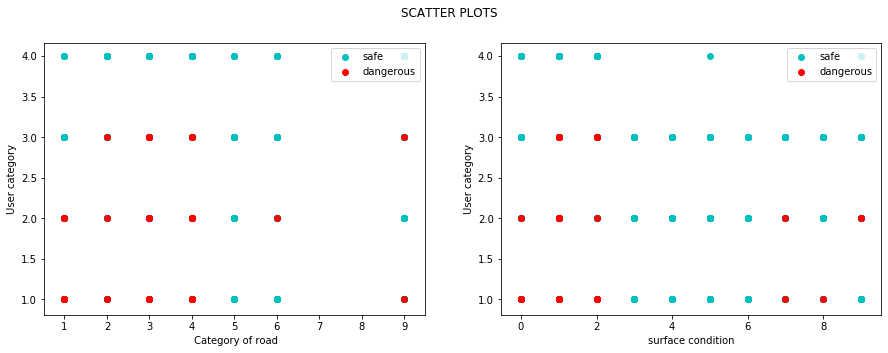

In [70]:
colors = ['c','r']
label_text = ["safe" ,"dangerous"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for cur_colour in [0, 1]:
    cur_df = train[train['y'] == cur_colour]
    axes[0].scatter(cur_df['catr'], cur_df['catu'], c = colors[cur_colour], label=label_text[cur_colour])
    
for cur_colour in [0, 1]:
    cur_df = train[train['y'] == cur_colour]
    axes[1].scatter(cur_df['surf'], cur_df['catu'], c = colors[cur_colour], label=label_text[cur_colour])

fig.suptitle("SCATTER PLOTS")
axes[0].set(xlabel=" Category of road", ylabel="User category")
axes[1].set(xlabel="surface condition", ylabel="User category")
axes[1].legend(loc=1);
axes[0].legend(loc=1);

In [71]:
from sklearn.linear_model import LogisticRegression
print("\n---------------------------------------------------------------------------------\n")
fitted_lr = LogisticRegression(C=1e7 ,solver='newton-cg', multi_class= 'ovr', max_iter = 1000000)
fitted_lr= fitted_lr.fit(x_train, y_train)
print("Parameters with sklearn fit:\n{}".format(fitted_lr.coef_))
print("const with sklearn fit:\n{}".format(fitted_lr.intercept_))
print("\n---------------------------------------------------------------------------------\n")


---------------------------------------------------------------------------------

Parameters with sklearn fit:
[[-0.1913852   0.03296234 -0.49035282 -0.25696397 -0.38095979]]
const with sklearn fit:
[-0.8543767]

---------------------------------------------------------------------------------



In [72]:
fitted_lr.score(x_train, y_train)

0.9630872483221476

In [73]:
fitted_lr.score(x_test, y_test)

0.9530201342281879

In [74]:
from sklearn.metrics import confusion_matrix

y_pred = fitted_lr.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[284,   0],
       [ 14,   0]], dtype=int64)